In [753]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
# from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [754]:
dpe = DPE('COM3')
dpe.set_clock(50)
# dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


## Read operation

Vread should be always between 0 and 0.45 (V)

..

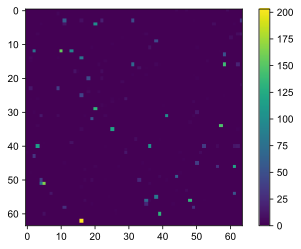

In [758]:
g = dpe.read(0, method='slow', Tdly=500, Vread=0.2)
plt.imshow(g * 1e6)
plt.colorbar()

..

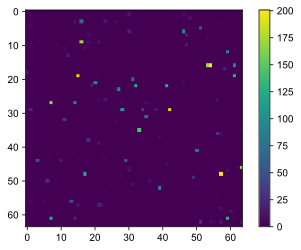

In [759]:
g = dpe.read(1, method='slow', Tdly=500, Vread=0.2)
plt.imshow(g *1e6)
plt.colorbar()

..

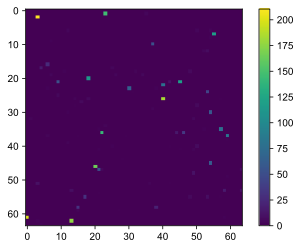

In [760]:
g = dpe.read(2, method='slow', Tdly=500, Vread=0.2)
plt.imshow(g *1e6)
plt.colorbar()

In [761]:
dpe.N_BIT = 8

In [763]:
## Programming A0_46 - Test switching of a few devices

In [765]:
from lib_data import *
import scipy.io as sio

arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetGValue = 60e-6
targetTolerance = 5e-6
targetRow = 2
targetCol = 2

targetGPos = np.zeros((64,64))
targetGPos[targetRow, targetCol] = targetGValue

Msel = np.zeros((64,64))
Msel[np.nonzero(targetGPos)] = 1

dataChip46Arr0_Test1 = dpe.tune_conductance(arr, targetGPos, saveHistory=True, maxSteps=600, maxRetry=3, method='fast', vSetRamp = [0.2, 3.2, 0.1], 
                                     vGateSetRamp = [0.3, 1.5, 0.05], vResetRamp = [0.3, 3.0, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=10e-6, TwidthReset=1e-3, 
                                     Gtol_in=5e-6, Gtol_out=10e-6, Msel=Msel, numReads=3)


Start programming, step=599, maxBound=0 yield= 0.00% - 0.00%
1.0 devices to be programmed...reset 0.0, set 1.0
Setting 1 devices...
Programming with external timing Twidth=10.000 us
Resetting 0 devices...
Programming with external timing Twidth=1000.000 us


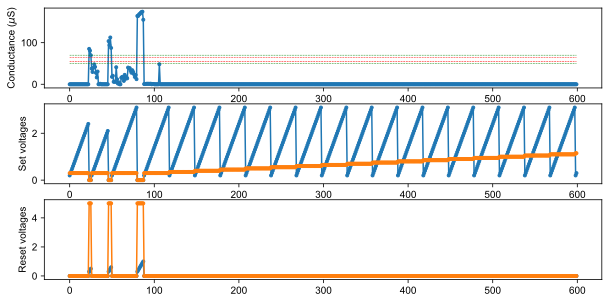

In [766]:
plot_history(targetRow, targetCol, dataChip46Arr0_Test1)

In [767]:
arr = 0
Vgate = 5
Vref = 0.5
vRead = 0.2

targetGValue = 100e-6
targetTolerance = 8e-6
targetRow = 4
targetCol = 4

targetGPos = np.zeros((64,64))
targetGPos[targetRow, targetCol] = targetGValue

Msel = np.zeros((64,64))
Msel[np.nonzero(targetGPos)] = 1

dataChip46Arr0_Test2 = dpe.tune_conductance(arr, targetGPos, saveHistory=True, maxSteps=250, maxRetry=2, method='fast', vSetRamp = [0.2, 3.2, 0.1], 
                                     vGateSetRamp = [0.3, 1.5, 0.1], vResetRamp = [0.3, 3.0, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=10e-6, TwidthReset=1e-3, 
                                     Gtol_in=targetTolerance, Gtol_out=1.5*targetTolerance, Msel=Msel, numReads=3)

Start programming, step=12, maxBound=0 yield= 0.00% - 0.00%
1.0 devices to be programmed...reset 0.0, set 1.0
Setting 1 devices...
Programming with external timing Twidth=10.000 us
Resetting 0 devices...
Programming with external timing Twidth=1000.000 us
------------------------------
Programming completed.


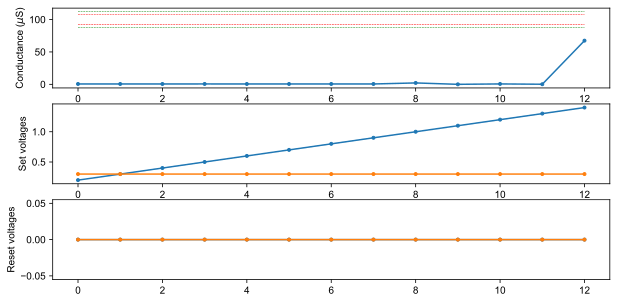

In [768]:
plot_history(targetRow, targetCol, dataChip46Arr0_Test2)

..

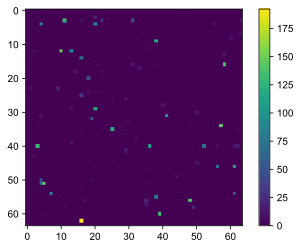

In [773]:
g = dpe.read(0, method='slow', Tdly=500, Vread=0.2)
plt.imshow(g * 1e6)
plt.colorbar()

In [772]:
g[4,4]

0.00010948191593352881